# (Relation between Alcohol Consumption-Academic Performance)
## Luis Domene García

## Context:

This anlysis belongs to the final project of the subject Data Engineering, the team was composed by Joan Bayona Corbalán Marino Oliveros Blanco and Luis Domene García.
This notebook correspond to my contribution to the project. 

The data were obtained in a survey of students math and portuguese language courses in secondary school. It contains a lot of interesting social, gender and study information about students. You can use it for some EDA or try to predict students final grade.
Content:


Attributes for both student-mat.csv (Math course) and student-por.csv (Portuguese language course) datasets:

    school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)
    sex - student's sex (binary: 'F' - female or 'M' - male)
    age - student's age (numeric: from 15 to 22)
    address - student's home address type (binary: 'U' - urban or 'R' - rural)
    famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
    Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)
    Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
    Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
    Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
    Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
    reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
    guardian - student's guardian (nominal: 'mother', 'father' or 'other')
    traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
    studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
    failures - number of past class failures (numeric: n if 1<=n<3, else 4)
    schoolsup - extra educational support (binary: yes or no)
    famsup - family educational support (binary: yes or no)
    paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
    activities - extra-curricular activities (binary: yes or no)
    nursery - attended nursery school (binary: yes or no)
    higher - wants to take higher education (binary: yes or no)
    internet - Internet access at home (binary: yes or no)
    romantic - with a romantic relationship (binary: yes or no)
    famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
    freetime - free time after school (numeric: from 1 - very low to 5 - very high)
    goout - going out with friends (numeric: from 1 - very low to 5 - very high)
    Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
    Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
    health - current health status (numeric: from 1 - very bad to 5 - very good)
    absences - number of school absences (numeric: from 0 to 93)

These grades are related with the course subject, Math or Portuguese:

    G1 - first period grade (numeric: from 0 to 20)
    G2 - second period grade (numeric: from 0 to 20)
    G3 - final grade (numeric: from 0 to 20, output target)


In [1]:
# Import the libraries

import pandas as pd
import matplotlib as plt 
import numpy as np
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import statistics

## Data Scrubbing / Data Inspection

The first step is cleaning the data basically transform the G1,G2,G3 to grades

In [2]:
math = pd.read_csv("student-mat.csv")
math.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [3]:
#Grade normalization function
def GradeNorm(g1, g2, g3):
    return ((g1+g2+g3)/3)/20*10

math['grades'] = math.apply(lambda row: GradeNorm(row['G1'], row['G2'], row['G3']), axis=1)

math = math.drop(["G1", "G2", "G3"], axis=1)

math.head()    

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,grades
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,6,2.833333
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,4,2.666667
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,10,4.166667
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,2,7.333333
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,4,4.333333


Let's look at the variables we're intered that basically are Weekend Alcohol Consumption and Daily Alcohol Consumption 

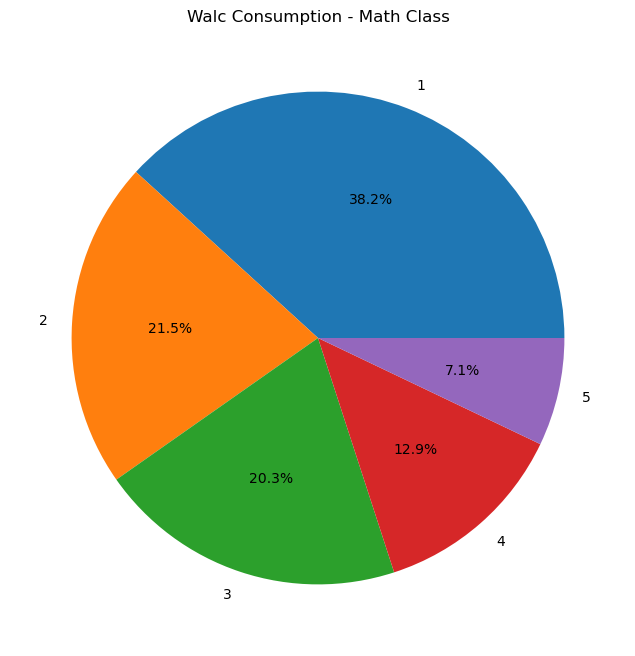

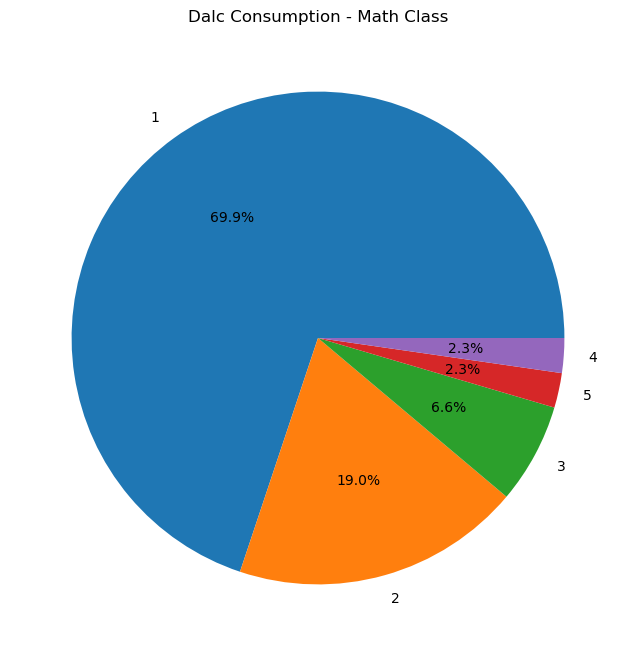

In [5]:

# Count the number of students in each category of Walc and Dalc
walc_counts_math = math['Walc'].value_counts()
dalc_counts_math = math['Dalc'].value_counts()

# Create a pie chart for Walc in Math class
plt.figure(figsize=(16, 8))
plt.pie(walc_counts_math, labels=walc_counts_math.index, autopct='%1.1f%%')
plt.title('Walc Consumption - Math Class')
plt.show()

# Create a pie chart for Dalc in Math class
plt.figure(figsize=(16, 8))
plt.pie(dalc_counts_math, labels=dalc_counts_math.index, autopct='%1.1f%%')
plt.title('Dalc Consumption - Math Class')
plt.show()

There is a huge difference between the amount of people that drink alcohol on work-days where near 70% of people does not consume alcohol comparing to weekend consumption where it is much more distributed.

Let's now look at the distribution of the marks of the students 

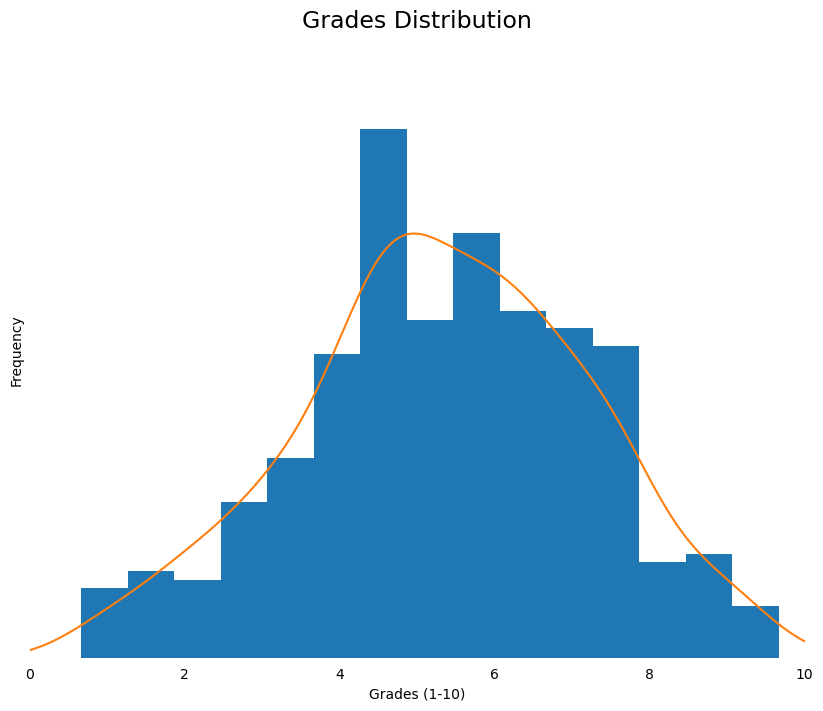

5.339662447257391

In [6]:
import matplotlib.pyplot as plt

# Create subplot
fig, ax = plt.subplots(figsize=(10, 8))

# Plot histogram
math['grades'].plot(kind="hist", density=True, bins=15, ax=ax)  # Change density to true because KDE uses density
# Plot KDE
math['grades'].plot(kind="kde", ax=ax)

# Set X axis label
ax.set_xlabel("Grades (1-10)")

# Set Y axis limits
ax.set_ylim(0, 0.3)
ax.set_xlim(0, 10)

# Remove Y ticks
ax.set_yticks([])

# Set Y axis label as "Frequency"
ax.set_ylabel("Frequency")

# Set title
ax.set_title("Grades Distribution", size=17, pad=10)

# Remove ticks and spines
ax.tick_params(left=False, bottom=False)
for spine in ax.spines.values():
    spine.set_visible(False)

plt.show()

# Calculate mean of grades
math['grades'].mean()



The grades show a more or less uniform distribution with a median around 5.33, the line on the histograms shows estimation of the probability density function. Next let's study how the variables interact between them in this case we will use a correlation matrix between all the variables in order to find possible correlation related with the alcohol consumption variables

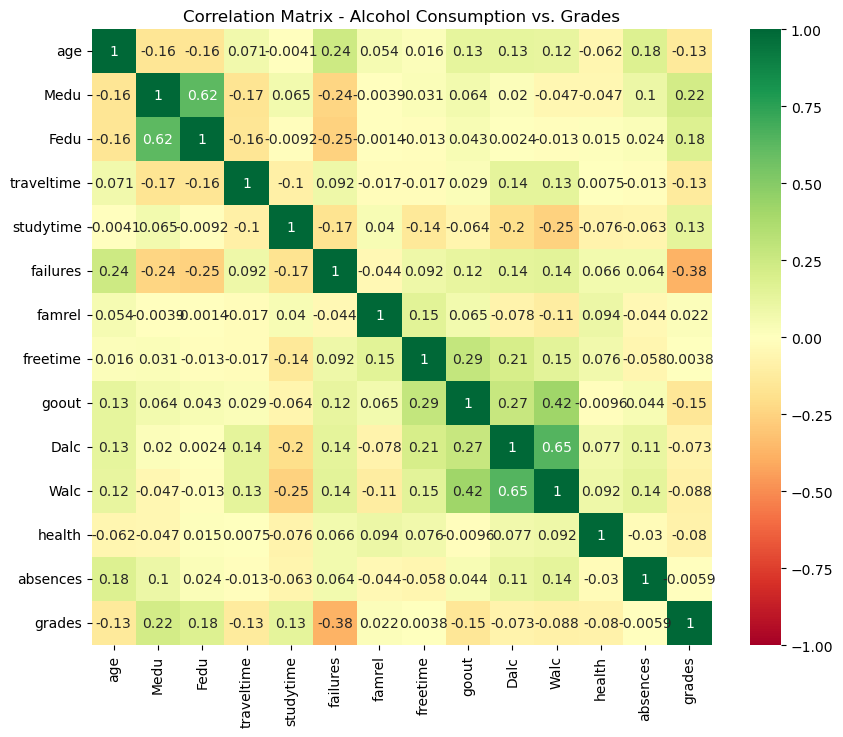

In [7]:
# Compute the correlation matrix
correlation_matrix = math.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="RdYlGn", vmin=-1, vmax=1)
plt.title("Correlation Matrix - Alcohol Consumption vs. Grades")
plt.show()


Looking at the correlation matrix we have selected the most relevant variables for this purpose

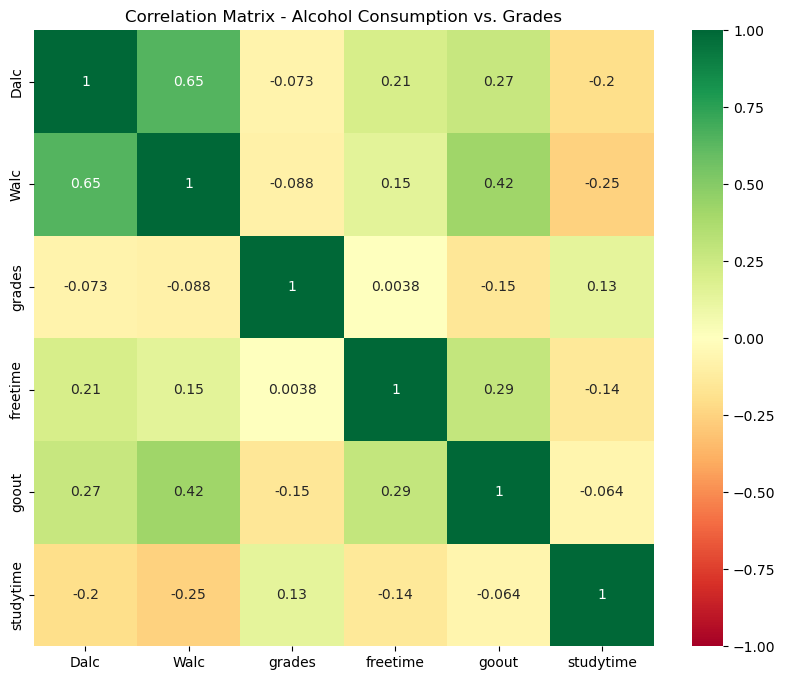

In [8]:
# Select the variables of interest
variables_of_interest = ['Dalc', 'Walc', 'grades','freetime', 'goout', 'studytime' ]
data = math[variables_of_interest]

# Compute the correlation matrix
correlation_matrix = data.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="RdYlGn", vmin=-1, vmax=1)
plt.title("Correlation Matrix - Alcohol Consumption vs. Grades")
plt.show()

Here we can deduce some things:
 1. A big positive correlation between both alcohol consumption variables as expected.
 2. We can also find less strong correlation between free time - going out  and going out - Daily Alcohol Consumption  and going out- Week- End alcohol consumption.  
 3. There is a bit negative correlation between study time and both consumption alcohol variables. Which is interesting now we discover if that negative correlation has some effect of the grades of the students

Let'ts look how the distributions change between the people that less alcohol consume against the people who consume more alcohol


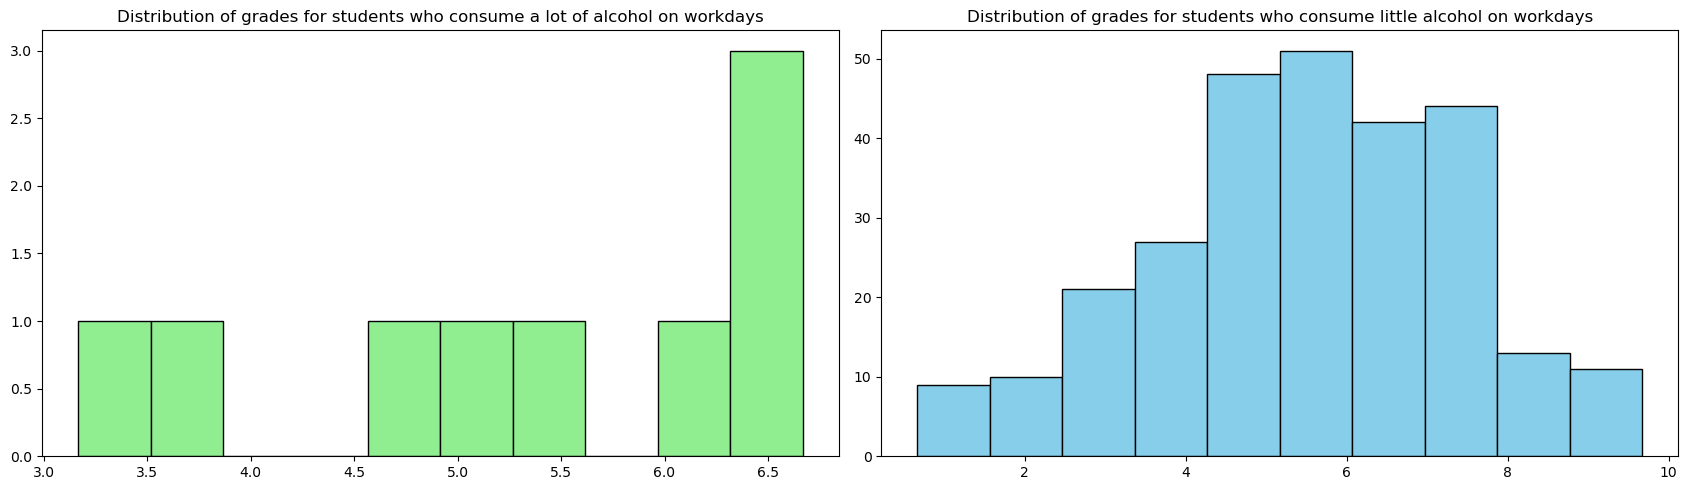

In [9]:
# Load the dataset
data = math

# Filter data for students who consume a lot of alcohol on weekends (Walc = 5)
high_alcohol_grades = data[data['Dalc'] == 5]['grades']

# Filter data for students who consume little alcohol on weekends (Walc = 1)
low_alcohol_grades = data[data['Dalc'] == 1]['grades']

# Create a figure and subplots
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(17, 5))

# Subplot 1: Distribution of grades for students who consume a lot of alcohol on weekends
ax1.hist(high_alcohol_grades, color='lightgreen', edgecolor='black')
ax1.set_title('Distribution of grades for students who consume a lot of alcohol on workdays')

# Subplot 2: Distribution of grades for students who consume little alcohol on weekends
ax2.hist(low_alcohol_grades, color='skyblue', edgecolor='black')
ax2.set_title('Distribution of grades for students who consume little alcohol on workdays')

# Adjust spacing between subplots
plt.tight_layout()

plt.show()

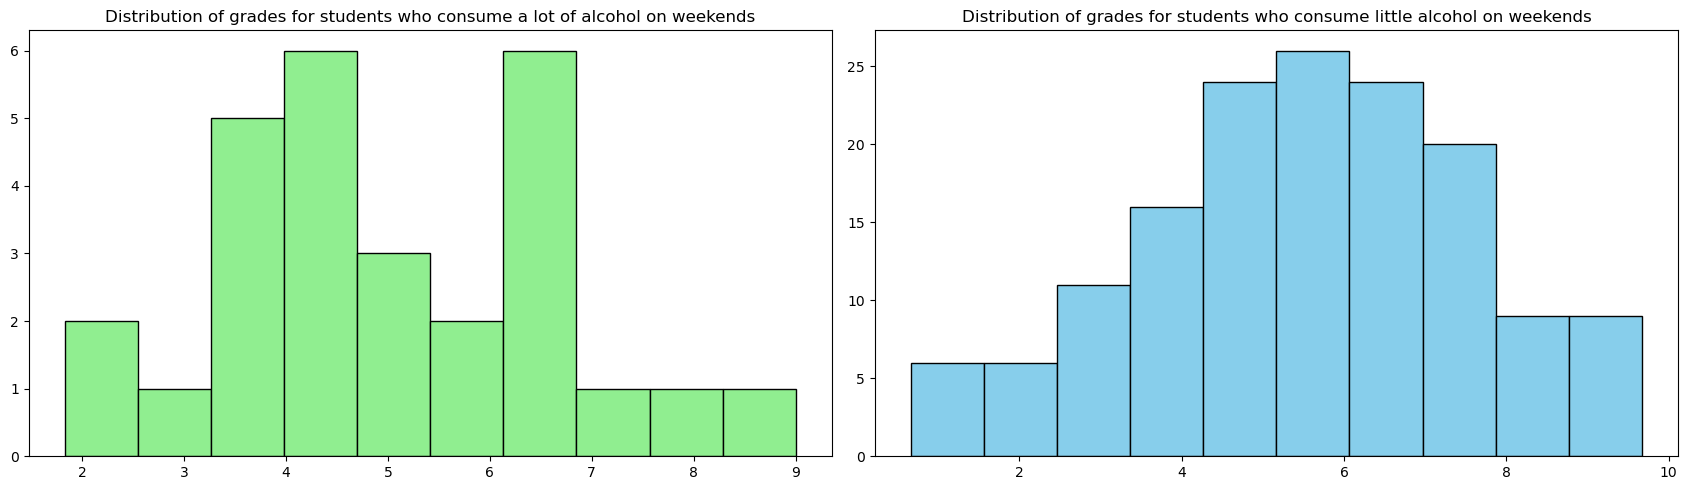

In [10]:
# Load the dataset
data = math

# Filter data for students who consume a lot of alcohol on weekends (Walc = 5)
high_alcohol_grades = data[data['Walc'] == 5]['grades']

# Filter data for students who consume little alcohol on weekends (Walc = 1)
low_alcohol_grades = data[data['Walc'] == 1]['grades']

# Create a figure and subplots
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(17, 5))

# Subplot 1: Distribution of grades for students who consume a lot of alcohol on weekends
ax1.hist(high_alcohol_grades, color='lightgreen', edgecolor='black')
ax1.set_title('Distribution of grades for students who consume a lot of alcohol on weekends')

# Subplot 2: Distribution of grades for students who consume little alcohol on weekends
ax2.hist(low_alcohol_grades, color='skyblue', edgecolor='black')
ax2.set_title('Distribution of grades for students who consume little alcohol on weekends')

# Adjust spacing between subplots
plt.tight_layout()

plt.show()

Now in order to make it more visually we we'll compare both distribution using the KNE which is the Kernel Density Estimation.

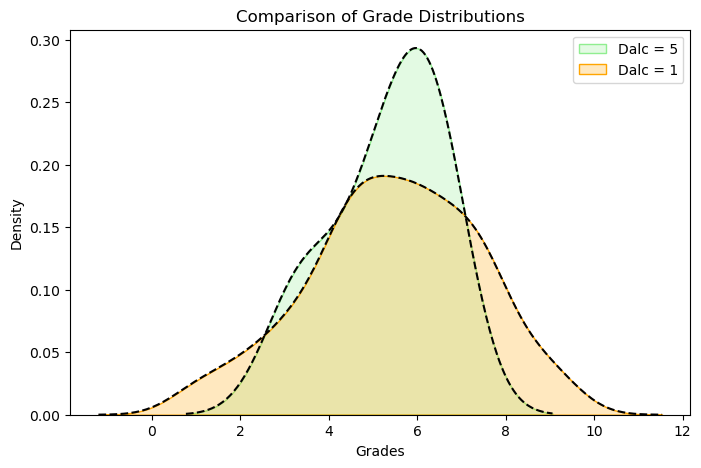

Mean Walc 5: 5.0773809523809526
Median Walc 5: 4.75
Mean Walc 1: 5.49448123620309
Median Walc 1: 5.5


Mean Dalc 5: 5.314814814814815
Median Dalc 5: 5.5
Mean Dalc 1: 5.4728260869565215
Median Dalc 1: 5.583333333333333


In [11]:
# Load the dataset
data = math

# Filter data for students who consume a lot of alcohol on weekends (Walc = 5)
high_alcohol_grades = data[data['Dalc'] == 5]['grades']

# Filter data for students who consume little alcohol on weekends (Walc = 1)
low_alcohol_grades = data[data['Dalc'] == 1]['grades']

# Create a figure and subplots
f, ax = plt.subplots(figsize=(8, 5))

# Plot KDE and PDF for students who consume a lot of alcohol on weekends

# Estimation of the probability density function
sns.kdeplot(high_alcohol_grades, color='lightgreen', shade=True, label='Dalc = 5', ax=ax)
sns.kdeplot(high_alcohol_grades, color='black', linestyle='--', ax=ax)

# Plot KDE and PDF for students who consume little alcohol on weekends
sns.kdeplot(low_alcohol_grades, color='orange', shade=True, label='Dalc = 1', ax=ax)
sns.kdeplot(low_alcohol_grades, color='black', linestyle='--', ax=ax)

# Set plot title and labels
ax.set_title('Comparison of Grade Distributions')
ax.set_xlabel('Grades')
ax.set_ylabel('Density')

# Show legend
ax.legend()

plt.show()



# Compute the mean
walc_mean_5 = statistics.mean(math[math['Walc'] == 5]['grades'])

# Compute the median
walc_median_5 = statistics.median(math[math['Walc'] == 5]['grades'])


# Compute the mean
walc_mean_1 = statistics.mean(math[math['Walc'] == 1]['grades'])

# Compute the median
walc_median_1 = statistics.median(math[math['Walc'] == 1]['grades'])


# Compute the mean
dalc_mean_5 = statistics.mean(math[math['Dalc'] == 5]['grades'])

# Compute the median
dalc_median_5 = statistics.median(math[math['Dalc'] == 5]['grades'])


# Compute the mean
dalc_mean_1 = statistics.mean(math[math['Dalc'] == 1]['grades'])

# Compute the median
dalc_median_1 = statistics.median(math[math['Dalc'] == 1]['grades'])


# Print the mean and median
print(f"Mean Walc 5: {walc_mean_5}")
print(f"Median Walc 5: {walc_median_5}")
print(f"Mean Walc 1: {walc_mean_1}")
print(f"Median Walc 1: {walc_median_1}")

print("\n")

print(f"Mean Dalc 5: {dalc_mean_5}")
print(f"Median Dalc 5: {dalc_median_5}")
print(f"Mean Dalc 1: {dalc_mean_1}")
print(f"Median Dalc 1: {dalc_median_1}")

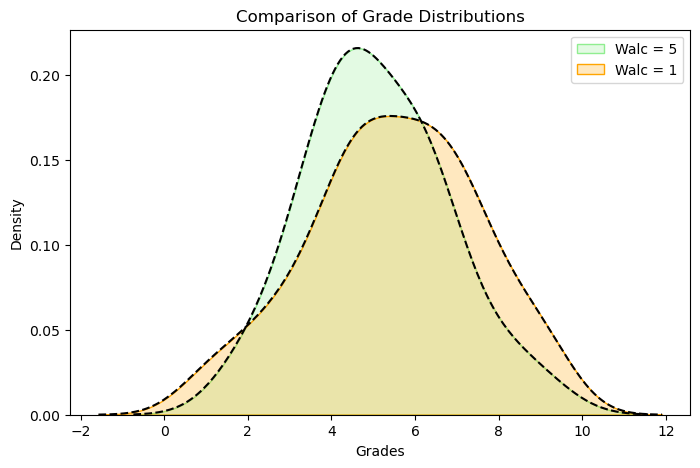

In [12]:
# Load the dataset
data = math

# Filter data for students who consume a lot of alcohol on weekends (Walc = 5)
high_alcohol_grades = data[data['Walc'] == 5]['grades']

# Filter data for students who consume little alcohol on weekends (Walc = 1)
low_alcohol_grades = data[data['Walc'] == 1]['grades']

# Create a figure and subplots
f, ax = plt.subplots(figsize=(8, 5))

# Plot KDE and PDF for students who consume a lot of alcohol on weekends

# Estimation of the probability density function
sns.kdeplot(high_alcohol_grades, color='lightgreen', shade=True, label='Walc = 5', ax=ax)
sns.kdeplot(high_alcohol_grades, color='black', linestyle='--', ax=ax)

# Plot KDE and PDF for students who consume little alcohol on weekends
sns.kdeplot(low_alcohol_grades, color='orange', shade=True, label='Walc = 1', ax=ax)
sns.kdeplot(low_alcohol_grades, color='black', linestyle='--', ax=ax)

# Set plot title and labels
ax.set_title('Comparison of Grade Distributions')
ax.set_xlabel('Grades')
ax.set_ylabel('Density')

# Show legend
ax.legend()

plt.show()

The median of the grades of the people who most consume in weekend is significantly less than the median of the grades of the people who less consume alcohol.

With the information we have extract from the data let's compare now using a boxplot how varies the alcohol consumption between two groups one represented by the people which are above the average grade and other group that consist on the people below the average grade.

In [13]:
average_grades = math['grades'].mean()

above_average = math[math['grades'] >= average_grades]
below_average = math[math['grades'] <= average_grades]
print(math.shape)
print(above_average.shape)
print (below_average.shape)

above_average_Dalc_mean = above_average['Dalc'].mean()
below_average_Dalc_mean = below_average['Dalc'].mean()

above_average_Walc_mean = above_average['Walc'].mean()
below_average_Walc_mean = below_average['Walc'].mean()

print(f"Above_average_Dalc_mean = {round (above_average_Dalc_mean,3)}   Below_average_Dalc_mean = {round (below_average_Dalc_mean,3)}")
print(f"Above_average_Walc_mean = {round (above_average_Walc_mean,3)}   Below_average_Walc_mean = {round (below_average_Walc_mean,3)}")

above_average

(395, 31)
(192, 31)
(203, 31)
Above_average_Dalc_mean = 1.417   Below_average_Dalc_mean = 1.542
Above_average_Walc_mean = 2.156   Below_average_Walc_mean = 2.419


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,grades
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,2,7.333333
5,GP,M,16,U,LE3,T,4,3,services,other,...,yes,no,5,4,2,1,2,5,10,7.500000
6,GP,M,16,U,LE3,T,2,2,other,other,...,yes,no,4,4,4,1,1,3,0,5.833333
8,GP,M,15,U,LE3,A,3,2,services,other,...,yes,no,4,2,2,1,1,1,0,8.833333
9,GP,M,15,U,GT3,T,3,4,other,other,...,yes,no,5,5,1,1,1,5,0,7.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
376,MS,F,20,U,GT3,T,4,2,health,other,...,yes,yes,5,4,3,1,1,3,4,7.333333
378,MS,F,18,U,GT3,T,3,3,other,other,...,yes,yes,4,1,3,1,2,1,0,7.500000
380,MS,M,18,U,GT3,T,4,4,teacher,teacher,...,yes,no,3,2,4,1,4,2,4,7.166667
391,MS,M,17,U,LE3,T,3,1,services,services,...,yes,no,2,4,5,3,4,2,3,7.666667


The histograms shows that generally people above the mean consume less alcohol

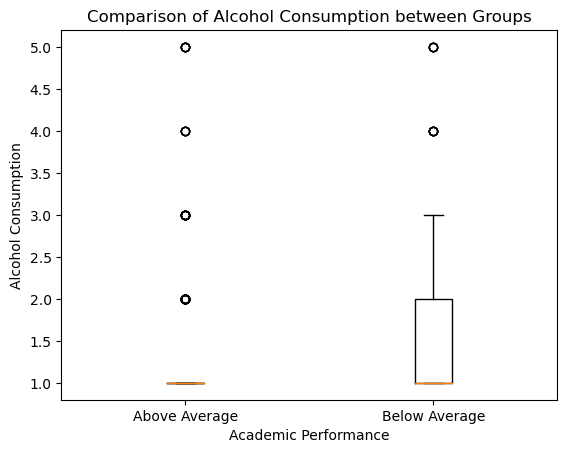

In [14]:
plt.boxplot([above_average['Dalc'], below_average['Dalc']], labels=['Above Average', 'Below Average'])
plt.xlabel('Academic Performance')
plt.ylabel('Alcohol Consumption')
plt.title('Comparison of Alcohol Consumption between Groups')
plt.show()


The box  plot shows that people below average consume more alcohol than people that are above average. It is important to highlight  the presence of outliers in both groups.

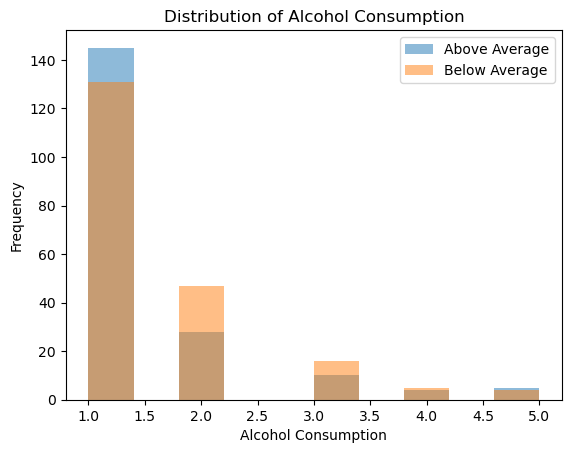

In [15]:
plt.hist(above_average['Dalc'], alpha=0.5, label='Above Average')
plt.hist(below_average['Dalc'], alpha=0.5, label='Below Average')
plt.xlabel('Alcohol Consumption')
plt.ylabel('Frequency')
plt.title('Distribution of Alcohol Consumption')
plt.legend()
plt.show()

We can observe from the two representations that there exist some outliers whose consumption of alcohol is very high although being above the average. In the first column we observe that people more people that drink low alchol in workdays is above the average in grades that below but the difference is very very  small 

Now we are going to study the most important relationship between three variables: workday alcohol consumption, weekend alcohol consumption and grades. Let's plot the variables in order to find some patterns


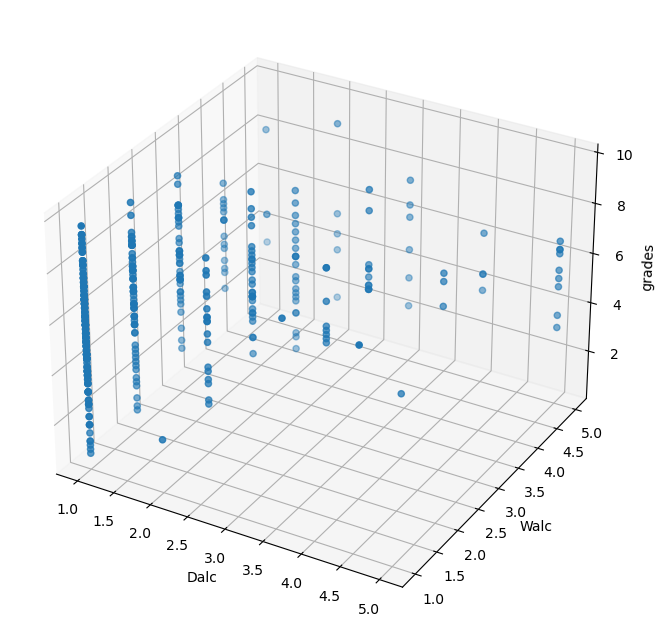

In [16]:
from mpl_toolkits.mplot3d import Axes3D

# Select the variables of interest
selected_columns = ['Dalc', 'Walc', 'grades']
data = math[selected_columns]

# Create the 3D scatter plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

# Extract the variables for the three axes
x = data['Dalc']
y = data['Walc']
z = data['grades']

# Plot the scatter points
ax.scatter(x, y, z)

# Set labels for each axis
ax.set_xlabel('Dalc')
ax.set_ylabel('Walc')
ax.set_zlabel('grades')

# Display the plot
plt.show()


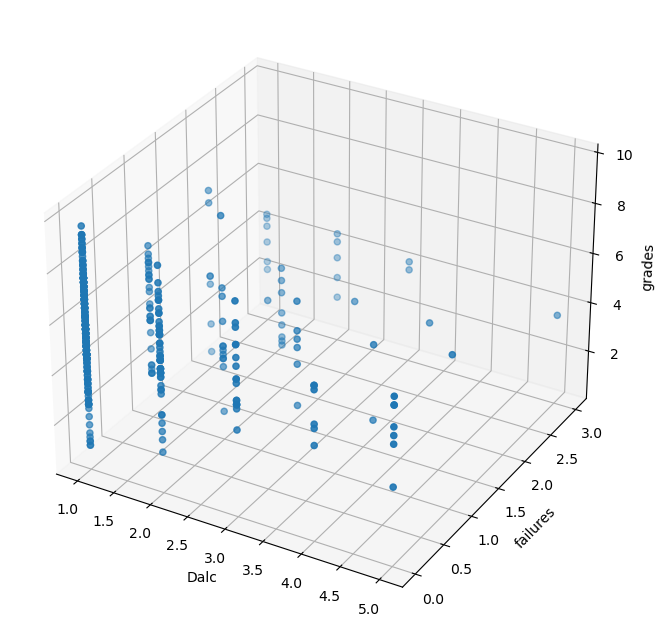

In [18]:
from mpl_toolkits.mplot3d import Axes3D


# Select the variables of interest
selected_columns = ['Dalc', 'failures', 'grades']
data = math[selected_columns]

# Create the 3D scatter plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

# Extract the variables for the three axes
x = data['Dalc']
y = data['failures']
z = data['grades']

# Plot the scatter points
ax.scatter(x, y, z)

# Set labels for each axis
ax.set_xlabel('Dalc')
ax.set_ylabel('failures')
ax.set_zlabel('grades')

# Display the plot
plt.show()

## PCA


The way the information is represented in 3D is quite difficult to find any pattern or extract conlcusion. So now we are going to reduce the dimensionality of the data with the purpose of make the representation more visual/ attractive

In [ ]:

# Select the relevant variables for analysis
selected_columns = ['Dalc', 'Walc', 'grades']
data = math[selected_columns]

print(data.shape)

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

(395, 3)


In [ ]:
# Create a PCA object and fit the scaled data
pca = PCA(n_components = 2)
pca.fit(scaled_data)

# Get the explained variance ratio
explained_var = pca.explained_variance_ratio_
var_1 = explained_var [0]
var_2 = explained_var [1]

print(explained_var.sum())
print (explained_var)

# Perform dimensionality reduction using PCA
reduced_data = pca.transform(scaled_data)

# Create a new DataFrame with the reduced dimensions
reduced_df = pd.DataFrame(reduced_data, columns=['PC1', 'PC2'])



# Add the target variable 'G3' to the reduced DataFrame
reduced_df['grades'] = data['grades']
reduced_df['Walc'] = data ['Walc']
print(reduced_df)


0.8825776594146553
[0.55562304 0.32695462]
          PC1       PC2    grades  Walc
0   -0.849231  1.515861  2.833333     1
1   -0.834079  1.604850  2.666667     1
2    0.897430  0.491276  4.166667     3
3   -1.258333 -0.886834  7.333333     1
4   -0.442890  0.632163  4.333333     2
..        ...       ...       ...   ...
390  3.517462 -0.146452  4.500000     5
391  1.904407 -1.607362  7.666667     4
392  1.679890  0.344201  4.166667     3
393  2.101383 -0.450509  5.500000     4
394  1.664738  0.255212  4.333333     3

[395 rows x 4 columns]


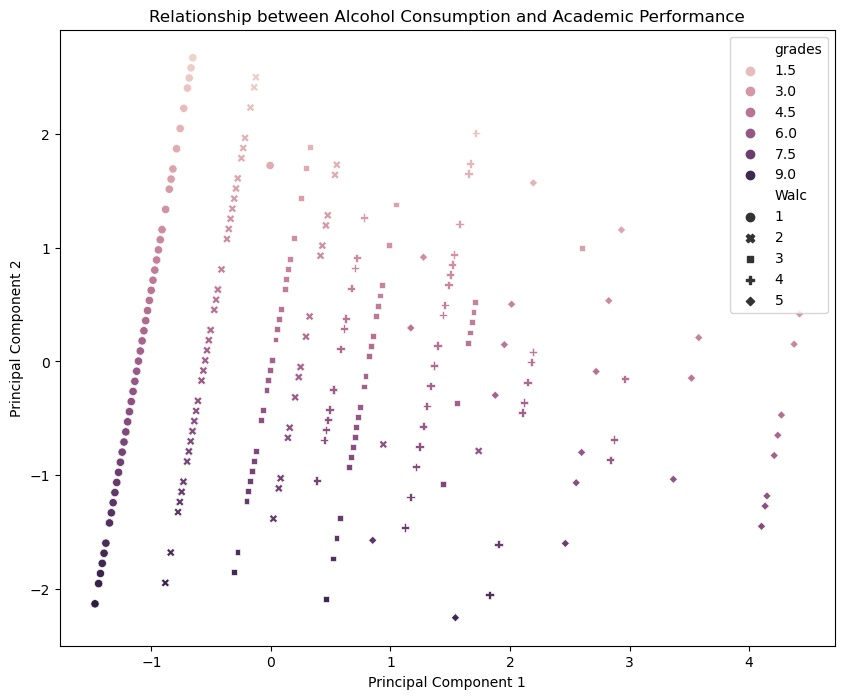

In [ ]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='grades', style= 'Walc',   data=reduced_df)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Relationship between Alcohol Consumption and Academic Performance')
plt.legend(loc='best')
plt.show()


With this representation we can get a better idea of how the data is structured in relation with alcohol consumption and the grades. Anyway it is not very very clear. We can compare the variable in a scatter plot

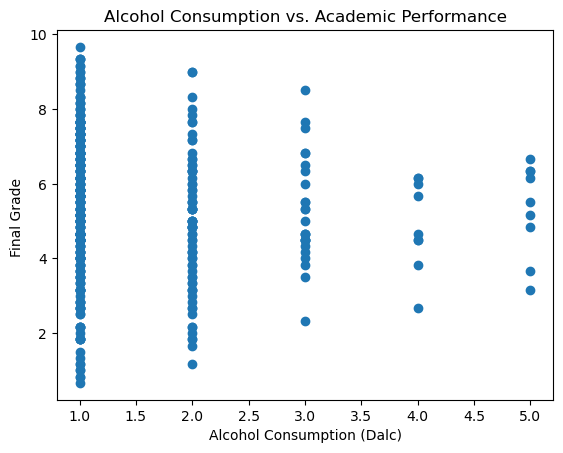

In [ ]:
import matplotlib.pyplot as plt

# Plot alcohol consumption (Dalc) against final grade (G3)
plt.scatter(math['Dalc'], math['grades'])
plt.xlabel('Alcohol Consumption (Dalc)')
plt.ylabel('Final Grade ')
plt.title('Alcohol Consumption vs. Academic Performance')
plt.show()

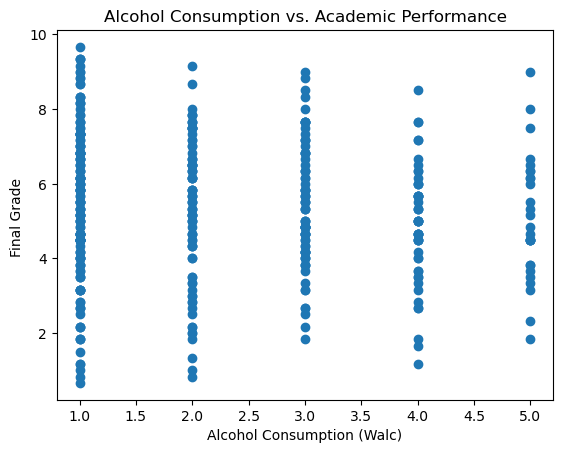

In [ ]:


# Plot alcohol consumption (Dalc) against final grade (G3)
plt.scatter(math['Walc'], math['grades'])
plt.xlabel('Alcohol Consumption (Walc)')
plt.ylabel('Final Grade ')
plt.title('Alcohol Consumption vs. Academic Performance')
plt.show()

On weekend the distribution of the alcohol consumption is much more homogeneous so it does not provide us much information about the dataset.

## K-Means

Now we want to find possible clusters inside the data. Once again we have chosen the Alcohol Consumption Variables and grades in order to cluster the dataset.

In [ ]:
features = ['grades','Dalc','failures']

X = math [features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

We use elbow method to determine the best number of clusters to our set

c:\Users\Usuario\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


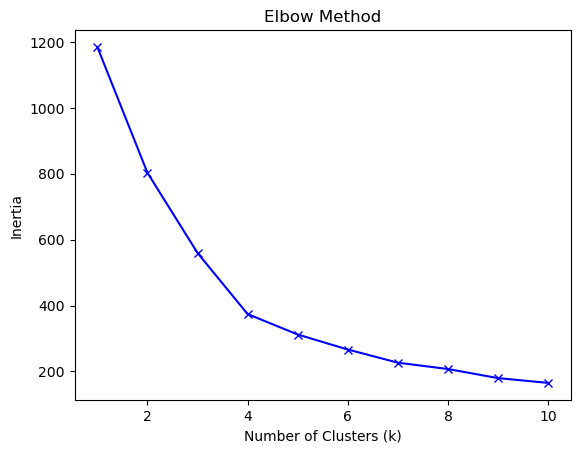

In [ ]:
# Use the elbow method to find the optimal k
inertia = []
k_values = range(1, 11)  # Test k values from 1 to 10

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(k_values, inertia, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

It seems that 4-5 would be a good option as number of clusters because of the form of the graphic. But we want a second opinion so we use silhouette_score that indicate how good a cluster is based on how close a data is to other points of the same cluster and separation that measures how far is from other clusters.


c:\Users\Usuario\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


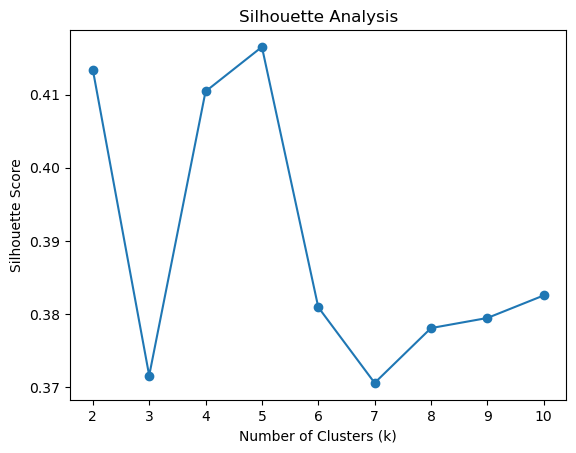

In [ ]:
from sklearn.metrics import silhouette_score

silhouette_scores = []

# Perform k-means clustering for different values of k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    labels = kmeans.labels_
    if len(set(labels)) > 1:  # Ensure there are at least 2 unique labels
        score = silhouette_score(X, labels)
        silhouette_scores.append(score)  # Append the silhouette score to the list
    else:
        silhouette_scores.append(None)  # Append None if there's only 1 unique label

# Plot the Silhouette scores
plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis')
plt.show()

The best option seems to be 5 so our "k" will be 5

In [ ]:
# Choose the desired number of clusters based on the elbow plot
k = 5

# Apply k-means clustering
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X_scaled)

# Assign cluster labels to the data points
labels = kmeans.labels_

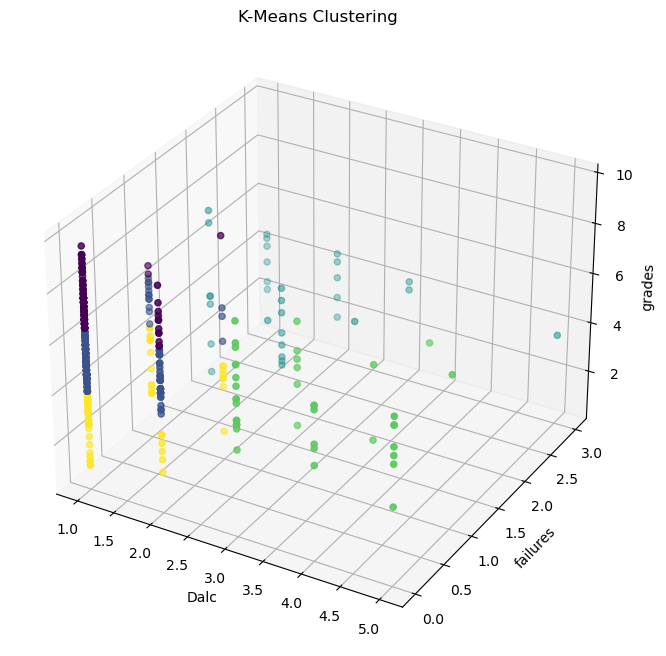

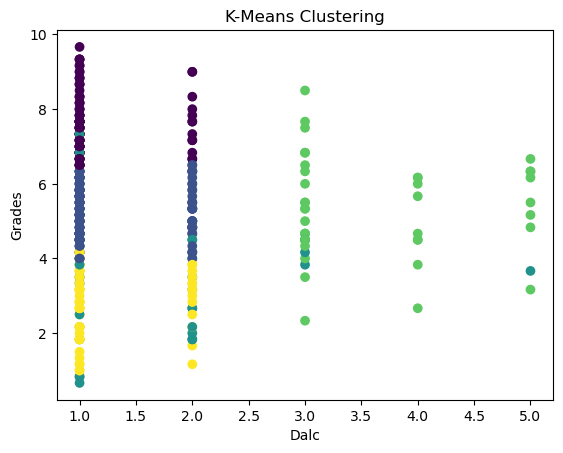

5.204545454545453
5.350574712643683


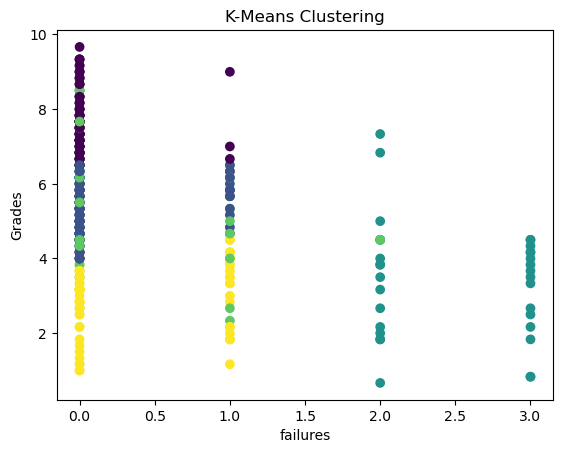

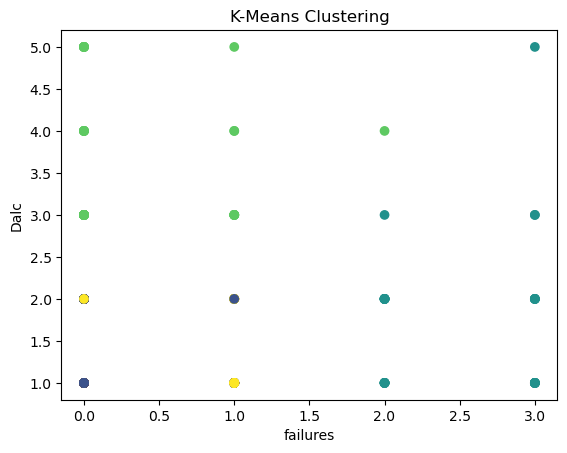

5.5142725598526745
3.4242424242424243


In [ ]:
# Create a 3D plot

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize= (10,8))
ax = fig.add_subplot(111, projection='3d')

# Plot the data points with color-coded clusters
ax.scatter(X['Dalc'], X['failures'], X['grades'], c=labels, cmap='viridis')

# Set labels for each axis
ax.set_xlabel('Dalc')
ax.set_ylabel('failures')
ax.set_zlabel('grades')

# Set title for the plot
ax.set_title('K-Means Clustering')

# Show the 3D plot
plt.show()


# Plot the clusters
plt.scatter(X['Dalc'], X['grades'], c=labels, cmap='viridis')
plt.xlabel('Dalc')
plt.ylabel('Grades')
plt.title('K-Means Clustering')
plt.show()

print(math [math['Dalc']>=3]['grades'].mean())
print(math [math['Dalc']<=3]['grades'].mean())

# Plot the clusters
plt.scatter(X['failures'], X['grades'], c=labels, cmap='viridis')
plt.xlabel('failures')
plt.ylabel('Grades')
plt.title('K-Means Clustering')
plt.show()

# Plot the clusters
plt.scatter(X['failures'], X['Dalc'], c=labels, cmap='viridis')
plt.xlabel('failures')
plt.ylabel('Dalc')
plt.title('K-Means Clustering')
plt.show()

print(math [math['failures']<2]['grades'].mean())
print(math [math['failures']>=2]['grades'].mean())




So in the data as we can see in the plots we can identify 5 different groups: 

1. Navy Blue: the grade of this group varies from (4-6), their consumption of alcohol is low (1-2) and the failures is low (0-1).   Average academic people  normal grades low alcohol consumption and low failures.

2. Purple: the grade of this group is the highest (6.5- 10), their consumptioon of alcohol  is very low (1-2) and the failures very low (0-1). Above-avereage academic  People, grades people with very low consumption of alochol and very low failures.

3. Green-Blue:  the grade of this group varies from  (1-4). The consumption of alcohol is disperse and the amount of failures is very high (2-3). Below-average academic People, low grades disperse consumption of alcohol and very high failures.

4. Yellow: the grade of these group varies from (1-4) their consumption of alcohol is low (1-2), and their failures also are low (1-2) Below-average academic People that not consume a lot of alcohol. Low grades, low failures, low alcohol consumption.

5. Green: the grade of these group is very disperse from (2.5-8.5), their consumption of alcohol is very high (3-5), and their failures are low (0-1). People that consume a lot of alcohol. Disperse grades and low failures. 

## CONCLUSION


In conclusion, our findings suggest that the consumption of alcohol may not have a definitive impact on students' grades. While there is a negative correlation between alcohol consumption and study time, and those who consume less alcohol tend to have slightly better grades compared to regular drinkers, this correlation alone does not provide sufficient evidence of a significant effect. Additionally, it is worth noting that the influence of alcohol consumption on grades appears to be more pronounced in individuals who consume large amounts on weekends, as opposed to those who drink less during weekends. However, it is crucial to acknowledge that other variables, such as the number of failures, play a more decisive role in determining grades and would likely be more important predictors than alcohol consumption.